# Caminata Aleatoria

El problema consiste en un caminante que empieza en un punto inicial (generalmente en el origen) y realiza movimientos al azar en una línea (unidimensional). En cada paso, el caminante tiene una probabilidad fija de moverse a la derecha (+1) o a la izquierda (-1).

## Propiedades y Consideraciones:

* Pasos al azar: En cada iteración, el caminante decide moverse a la izquierda o derecha con igual probabilidad (50/50) o con alguna probabilidad diferente si así se establece.
* Desplazamiento total: Después de un número dado de pasos, el caminante podría estar en una posición diferente del origen.
* Distribución: La distribución de las posiciones después de muchos pasos tiende a una distribución normal, centrada en el origen, si la probabilidad de moverse en ambas direcciones es la misma.


Primero importamos la librerias que se utilizaran y variables como el número de pasos y el número de caminatas

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# Parámetros
num_pasos = 100  # Número de pasos
num_caminatas = 10000  # Número de caminatas
num_caminatas2 = 1000

En esta parte se crea una representación general del problema, con $10^{4}$ caminatas y $10^{2}$ pasos

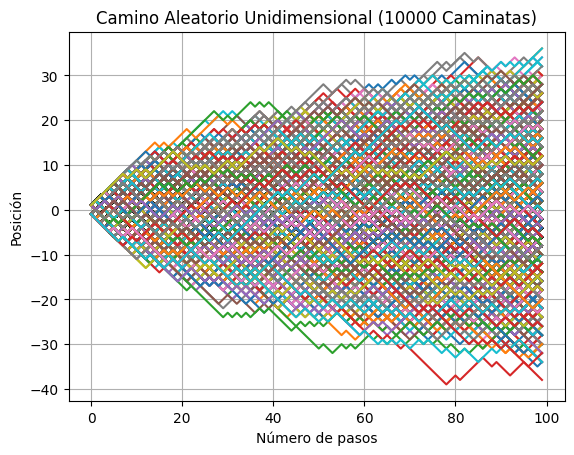

In [39]:
# Simulación de caminatas aleatorias unidimensionales
for i in range(num_caminatas):
    # Genera una caminata aleatoria: -1 para paso a la izquierda, 1 para paso a la derecha
    steps = np.random.choice([-1, 1], size=num_pasos)
    
    # Calcula la posición en cada paso
    position = np.cumsum(steps)
    
    # Genera un gráfico para la caminata actual
    plt.plot(position, label=f'Camino {i+1}')

# Personalización del gráfico
plt.title('Camino Aleatorio Unidimensional (10000 Caminatas)')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()


Ahora hacemos una consideración, tomamos los valores o posibles caminatas que no tiene valores negativos al llegar a los $10^{2}$ pasos, con color morado se representan estas posibles caminatas y su probabilidad

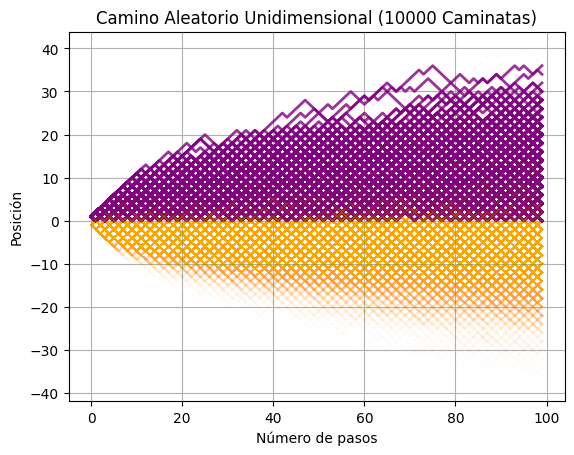

Número de caminos que no tienen valores negativos: 766
Probabilidad de caminos que no tienen valores negativos: 0.0766


In [40]:
# Variable para contar los caminos que no son negativos
negativos = 0

# Simulación de caminatas aleatorias unidimensionales
for i in range(num_caminatas):
    # Genera una caminata aleatoria: -1 para paso a la izquierda, 1 para paso a la derecha
    pasos = np.random.choice([-1, 1], size=num_pasos)
    
    # Calcula la posición en cada paso
    posicion = np.cumsum(pasos)

    # Verifica si todos los valores de la caminata son no negativos
    if np.all(posicion >= 0):
        negativos += 1
        plt.plot(posicion, color='purple', alpha=0.8, linewidth=2)  # Resalta los caminos no negativos en verde
    else:
        plt.plot(posicion, color='orange', alpha=0.01)  # Trazos sutiles para los caminos con valores negativos
    
# Cálculo de la probabilidad
probabilidad = negativos / num_caminatas

# Personalización del gráfico
plt.title('Camino Aleatorio Unidimensional (10000 Caminatas)')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

# Resultado de la cuenta
print(f'Número de caminos que no tienen valores negativos: {negativos}')
print(f'Probabilidad de caminos que no tienen valores negativos: {probabilidad:.4f}')


Ahora tomamos un segunda consideración, todas las posibles caminatas que finalizan en cero al realizar $10^{2}$ pasos

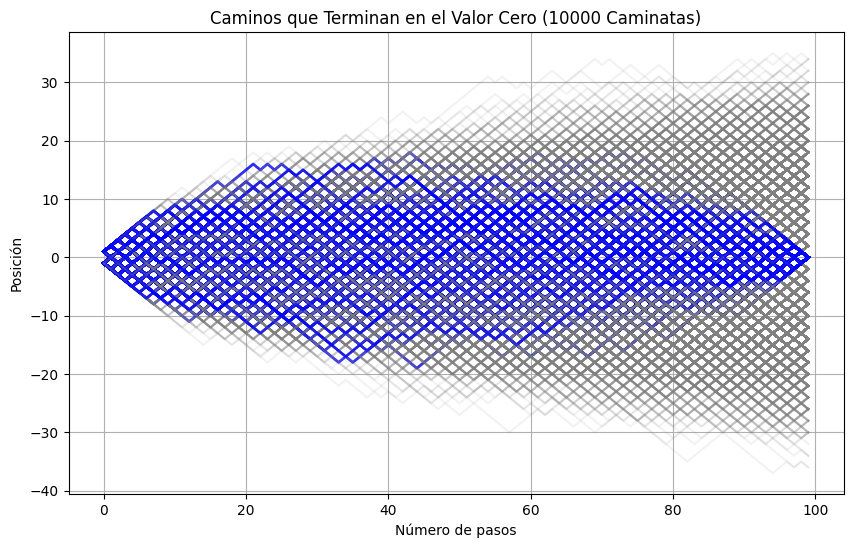

Número de caminos que terminan en el valor cero: 801
Probabilidad de que una caminata termine en cero: 0.0801


In [41]:
# Variable para contar los caminos que terminan en cero
caminos_que_terminan_en_cero = 0

# Simulación de caminatas aleatorias unidimensionales
plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura
for i in range(num_caminatas):
    # Genera una caminata aleatoria: -1 para paso a la izquierda, 1 para paso a la derecha
    pasos = np.random.choice([-1, 1], size=num_pasos)
    
    # Calcula la posición en cada paso
    posicion = np.cumsum(pasos)
    
    # Verifica si la caminata termina en cero
    if posicion[-1] == 0:
        caminos_que_terminan_en_cero += 1
        plt.plot(posicion, color='blue', alpha=0.8, linewidth=2)  # Resalta los caminos que terminan en cero en azul
    else:
        plt.plot(posicion, color='gray', alpha=0.1)  # Caminos en gris con baja opacidad para el resto

# Cálculo de la probabilidad de que una caminata termine en cero
probabilidad_terminar_en_cero = caminos_que_terminan_en_cero / num_caminatas

# Personalización del gráfico
plt.title('Caminos que Terminan en el Valor Cero (10000 Caminatas)')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

# Resultado de la cuenta
print(f'Número de caminos que terminan en el valor cero: {caminos_que_terminan_en_cero}')
print(f'Probabilidad de que una caminata termine en cero: {probabilidad_terminar_en_cero:.4f}')




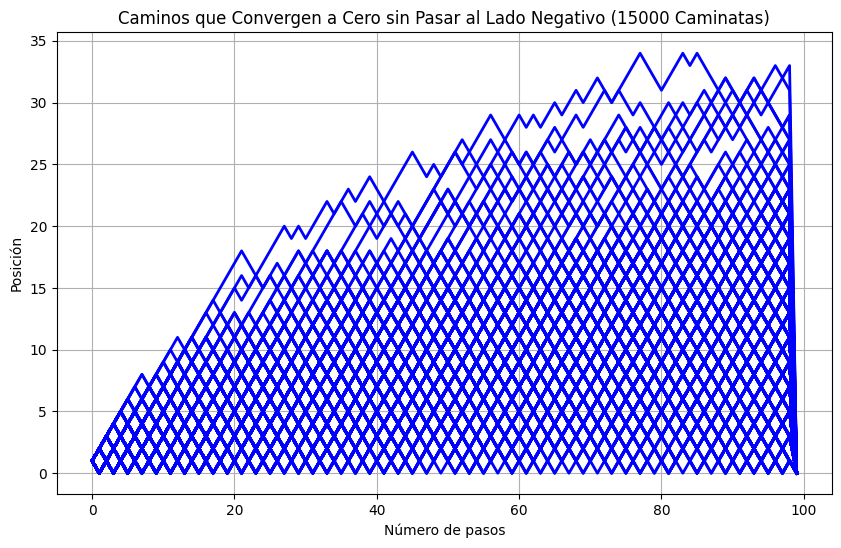

Número de caminos que alcanzan el valor cero sin pasar al lado negativo y convergen a cero: 395
Probabilidad de caminos que cumplen la condición: 0.0395


In [42]:
# Variable para contar los caminos que cumplen con la condición
zero_non_negative_count = 0

# Simulación de caminatas aleatorias unidimensionales
plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura
for i in range(num_caminatas):
    # Genera una caminata aleatoria: -1 para paso a la izquierda, 1 para paso a la derecha
    steps = np.random.choice([-1, 1], size=num_pasos)
    
    # Calcula la posición en cada paso
    position = np.cumsum(steps)
    
    # Verifica si la caminata alcanza el valor cero y nunca pasa al lado negativo
    if np.any(position == 0) and np.all(position >= 0):
        # Forzar la convergencia a cero al final
        position[-1] = 0
        zero_non_negative_count += 1
        plt.plot(position, color='blue', alpha=1.0, linewidth=2)  # Resalta los caminos en azul

# Personalización del gráfico
plt.title('Caminos que Convergen a Cero sin Pasar al Lado Negativo (15000 Caminatas)')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

# Cálculo de la probabilidad
probabilidad = zero_non_negative_count / num_caminatas

# Resultado de la cuenta
print(f'Número de caminos que alcanzan el valor cero sin pasar al lado negativo y convergen a cero: {zero_non_negative_count}')
print(f'Probabilidad de caminos que cumplen la condición: {probabilidad:.4f}')




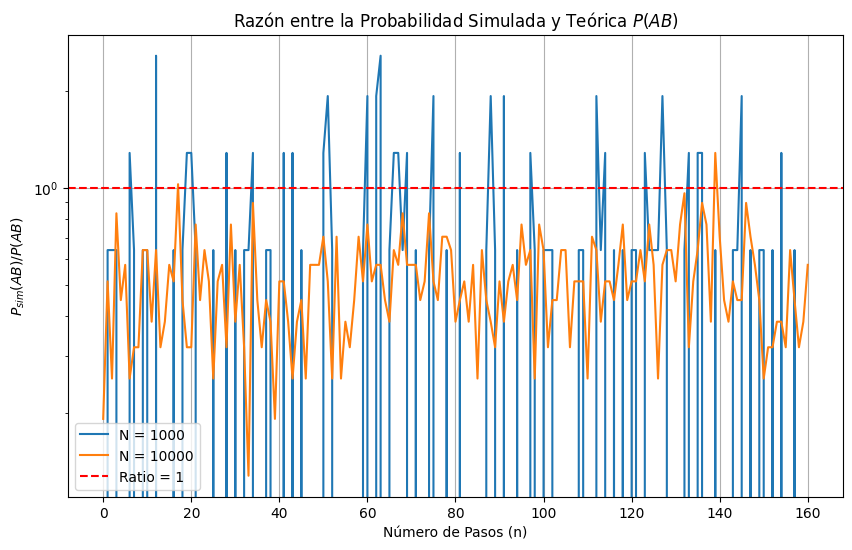

In [44]:
# Parámetros
P_AB_teorico = 0.00156057328  # Valor Teórico P(AB)
n = 80  # Número de pasos (n)
N_values = [1000, 10000]  # Valores de N (número de caminatas aleatorias)

# Valores de n desde 0 hasta 2n
n_values = np.arange(0, 2 * n + 1)

# Generar listas para almacenar los ratios
ratios_list = []


# Función para Generar Caminatas Aleatorias y Contar Caminatas Válidas
def generar_caminatas(N, n):
    caminatas_validas = []
    for _ in range(N):
        pasos = np.random.choice([-1, 1], size=2 * n)
        posicion = np.cumsum(pasos)
        if posicion[-1] == 0 and np.all(posicion >= 0):
            caminatas_validas.append(pasos)
    return np.array(caminatas_validas)


# Simulación y Cálculo de la Razón P_sim(AB)/P(AB)
for N in N_values:
    ratios = []
    for _ in range(len(n_values)):
        # Generar caminatas y contar caminatas válidas
        caminatas_validas = generar_caminatas(N, n)
        
        # Probabilidad simulada P_sim(AB)
        P_sim_AB = len(caminatas_validas) / N
        
        # Calcular la razón P_sim(AB)/P(AB)
        ratio = P_sim_AB / P_AB_teorico
        ratios.append(ratio)
    ratios_list.append(ratios)


# Graficar la Razón P_sim(AB)/P(AB)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
for i in range(len(ratios_list)):  # Generar una gráfica para cada N
    plt.plot(n_values, ratios_list[i], linestyle='-', label=f'N = {N_values[i]}')
plt.axhline(y=1, color='r', linestyle='--', label='Ratio = 1')
plt.xlabel('Número de Pasos (n)')
plt.ylabel(r'$P_{sim}(AB) / P(AB)$')
plt.title('Razón entre la Probabilidad Simulada y Teórica $P(AB)$')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Escala logarítmica para mejorar la visualización
plt.show()





Por ultimo se realiza un histograma. Este simula un proceso aleatorio donde un objeto puede moverse a la izquierda o a la derecha en cada paso. Al repetir este proceso muchas veces, se obtiene una distribución de las posibles posiciones finales del objeto. El histograma visualiza esta distribución, mostrando qué tan probable es que el objeto termine en una posición determinada después de un número determinado de pasos.

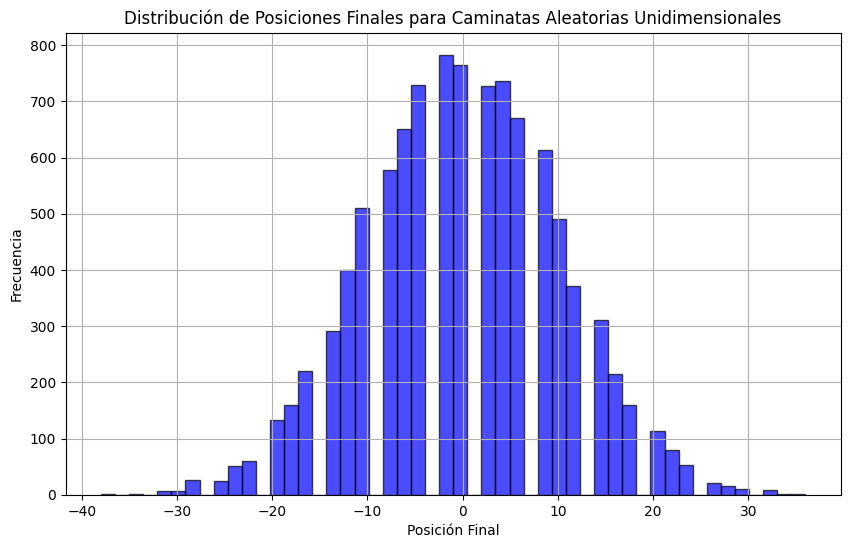

In [ ]:
# Lista para almacenar la posición final de cada caminata
final_positions = []

# Simulación de caminatas aleatorias unidimensionales
for i in range(num_caminatas):
    # Genera una caminata aleatoria: -1 para paso a la izquierda, 1 para paso a la derecha
    steps = np.random.choice([-1, 1], size=num_pasos)
    
    # Calcula la posición en cada paso
    position = np.cumsum(steps)
    
    # Almacena la posición final de la caminata
    final_positions.append(position[-1])

# Genera un histograma de las posiciones finales
plt.figure(figsize=(10, 6))
plt.hist(final_positions, bins=50, color='blue', edgecolor='black', alpha=0.7)

# Personalización del gráfico
plt.title('Distribución de Posiciones Finales para Caminatas Aleatorias Unidimensionales')
plt.xlabel('Posición Final')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
